In [40]:
"""
Exercise 03: Combat Overfitting - Starter Code

Apply multiple regularization techniques to an overfitting model.

Prerequisites:
- Reading: 03-early-stopping-callbacks.md
- Reading: 04-overfitting-mitigation-strategies.md
- Demo: demo_04_regularization_techniques.py (KEY REFERENCE)
"""

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import numpy as np
import matplotlib.pyplot as plt

In [41]:

# ============================================================================
# SETUP: Overfitting Scenario (PROVIDED)
# ============================================================================

def create_overfitting_data():
    """Create small dataset that's easy to overfit."""
    np.random.seed(42)
    n_samples = 500
    n_features = 50
    
    X = np.random.randn(n_samples, n_features).astype('float32')
    # Only first 5 features matter
    y = (X[:, 0] + X[:, 1] - X[:, 2] + 0.5*X[:, 3] + 
         np.random.randn(n_samples)*0.5 > 0).astype('float32')
    
    return (X[:400], y[:400]), (X[400:], y[400:])


def create_model(regularization=None, dropout_rate=0.0):
    """
    Create model with optional regularization.
    
    Args:
        regularization: L1/L2 regularizer or None
        dropout_rate: Dropout probability (0 = no dropout)
    """
    model = keras.Sequential()
    
    model.add(layers.Dense(256, activation='relu', input_shape=(50,),
                          kernel_regularizer=regularization))
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(128, activation='relu',
                          kernel_regularizer=regularization))
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(64, activation='relu',
                          kernel_regularizer=regularization))
    if dropout_rate > 0:
        model.add(layers.Dropout(dropout_rate))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [42]:

# ============================================================================
# TASK 3.1: Demonstrate Overfitting
# ============================================================================

def demonstrate_overfitting():
    """
    Train baseline without regularization to show overfitting.
    """
    print("Task 3.1: Baseline (Overfitting)")
    
    (X_train, y_train), (X_val, y_val) = create_overfitting_data()
    
    model = create_model(regularization=None, dropout_rate=0.0)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        verbose=0
    )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    gap = train_acc - val_acc
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Val Accuracy:   {val_acc:.4f}")
    print(f"Gap:            {gap:.4f}")
    
    return history


In [43]:

# ============================================================================
# TASK 3.2: Apply Dropout
# ============================================================================

def apply_dropout():
    """
    Add dropout regularization.
    """
    print("Task 3.2: Dropout")
    
    (X_train, y_train), (X_val, y_val) = create_overfitting_data()
    
    model = create_model(dropout_rate=0.3)
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        verbose=0
    )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    gap = train_acc - val_acc
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Val Accuracy:   {val_acc:.4f}")
    print(f"Gap:            {gap:.4f}")
    print("Note that the dropout regularization did not fix the overfiting problem")
    return history



In [44]:

# ============================================================================
# TASK 3.3: Apply L2 Regularization
# ============================================================================

def apply_l2():
    """
    Add L2 weight regularization.
    """
    print("Task 3.3: L2 Regularization")
    
    (X_train, y_train), (X_val, y_val) = create_overfitting_data()
    
    model = create_model(regularization=regularizers.l2(0.01))
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        verbose=0
    )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    gap = train_acc - val_acc
    
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Val Accuracy:   {val_acc:.4f}")
    print(f"Gap:            {gap:.4f}")

    print("Note that the L2 regularization also did not fix the overfiting problem!")
    
    return history


In [45]:

# ============================================================================
# TASK 3.4: Apply Early Stopping
# ============================================================================

def apply_early_stopping():
    """
    Use early stopping to prevent overfitting.
    """
    print("Task 3.4: Early Stopping")
    
    (X_train, y_train), (X_val, y_val) = create_overfitting_data()
    
    model = create_model()
    
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        verbose=0,
        callbacks=[early_stop]
    )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    gap = train_acc - val_acc
    
    print(f"Stopped at epoch: {len(history.history['loss'])}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Val Accuracy:   {val_acc:.4f}")
    print(f"Gap:            {gap:.4f}")
    
    print("Note that the early stopping was the most effective but it still did not fix the overfiting problem")
    return history



In [46]:

# ============================================================================
# TASK 3.5: Combined Regularization
# ============================================================================

def combined_regularization():
    """
    Apply all techniques together.
    """
    print("Task 3.5: Combined Regularization")
    
    (X_train, y_train), (X_val, y_val) = create_overfitting_data()
    
    model = create_model(
        regularization=regularizers.l2(0.01),
        dropout_rate=0.3
    )
    
    early_stop = keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=15,
        restore_best_weights=True
    )
    
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=100,
        batch_size=32,
        verbose=0,
        callbacks=[early_stop]
    )
    
    train_acc = history.history['accuracy'][-1]
    val_acc = history.history['val_accuracy'][-1]
    gap = train_acc - val_acc
    
    print(f"Stopped at epoch: {len(history.history['loss'])}")
    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Val Accuracy:   {val_acc:.4f}")
    print(f"Gap:            {gap:.4f}")
    
    return history




In [ ]:

# ============================================================================
# TASK 3.6: Comparison Plot
# ============================================================================

def plot_all_results():
    """
    Plot val_accuracy for all methods on same graph.
    """
    h_baseline = demonstrate_overfitting()
    h_dropout = apply_dropout()
    h_l2 = apply_l2()
    h_early = apply_early_stopping()
    h_combined = combined_regularization()
    
    plt.figure(figsize=(10, 6))
    plt.plot(h_baseline.history['val_accuracy'], label='Baseline')
    plt.plot(h_dropout.history['val_accuracy'], label='Dropout')
    plt.plot(h_l2.history['val_accuracy'], label='L2')
    plt.plot(h_early.history['val_accuracy'], label='Early Stopping')
    plt.plot(h_combined.history['val_accuracy'], label='Combined')
    
    plt.xlabel('Epoch')
    plt.ylabel('Validation Accuracy')
    plt.title('Regularization Techniques Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.savefig('regularization_comparison.png')
    plt.show()
    print("Saved: regularization_comparison.png")

def write_analysis():
    """
    Write analysis.txt answering key questions.
    """
    analysis = """Regularization Analysis
==================================================
PLEASE NOTE: Running this program will create different values due to the non-deterministic nature of model training.
1. Which technique was most effective alone?
   -> Early stopping was most effective: Val Accuracy: 0.8600

2. Did combining techniques help?
   -> no because the combined approach result is: Val Accuracy: 0.8400

3. What was the train/val gap for each?
Task 3.1: Baseline (Overfitting)
Train Accuracy: 1.0000
Val Accuracy:   0.8300
Gap:            0.1700
Task 3.2: Dropout
Train Accuracy: 0.9950
Val Accuracy:   0.8500
Gap:            0.1450
Note that the dropout regularization did not fix the overfiting problem
Task 3.3: L2 Regularization
Train Accuracy: 1.0000
Val Accuracy:   0.8400
Gap:            0.1600
Note that the L2 regularization also did not fix the overfiting problem!
Task 3.4: Early Stopping
Stopped at epoch: 14
Train Accuracy: 1.0000
Val Accuracy:   0.8600
Gap:            0.1400
Note that the early stopping was the most effective but it still did not fix the overfiting problem
Task 3.5: Combined Regularization
Stopped at epoch: 65
Train Accuracy: 1.0000
Val Accuracy:   0.8400
Gap:            0.1600

4. What's the tradeoff between regularization and model capacity?
   -> More regularization = lower train acc but better generalization
"""
    
    with open('analysis.txt', 'w') as f:
        f.write(analysis)
    print("Saved: analysis.txt")
    print(analysis)


Exercise 03: Combat Overfitting
Task 3.1: Baseline (Overfitting)
Train Accuracy: 1.0000
Val Accuracy:   0.8600
Gap:            0.1400
Task 3.2: Dropout
Train Accuracy: 1.0000
Val Accuracy:   0.8500
Gap:            0.1500
Note that the dropout regularization did not fix the overfiting problem
Task 3.3: L2 Regularization
Train Accuracy: 1.0000
Val Accuracy:   0.8600
Gap:            0.1400
Note that the L2 regularization also did not fix the overfiting problem!
Task 3.4: Early Stopping
Stopped at epoch: 14
Train Accuracy: 1.0000
Val Accuracy:   0.8600
Gap:            0.1400
Note that the early stopping was the most effective but it still did not fix the overfiting problem
Task 3.5: Combined Regularization
Stopped at epoch: 57
Train Accuracy: 1.0000
Val Accuracy:   0.8600
Gap:            0.1400


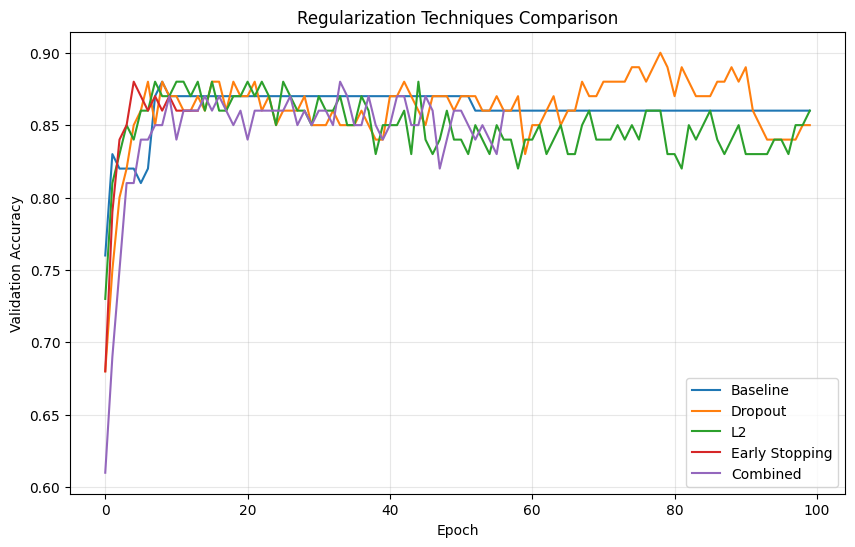

Saved: regularization_comparison.png
Saved: analysis.txt
Regularization Analysis

1. Which technique was most effective alone?
   -> Early stopping was most effective: Val Accuracy: 0.8600

2. Did combining techniques help?
   -> no because the combined approach result is: Val Accuracy: 0.8400

3. What was the train/val gap for each?
Task 3.1: Baseline (Overfitting)
Train Accuracy: 1.0000
Val Accuracy:   0.8300
Gap:            0.1700
Task 3.2: Dropout
Train Accuracy: 0.9950
Val Accuracy:   0.8500
Gap:            0.1450
Note that the dropout regularization did not fix the overfiting problem
Task 3.3: L2 Regularization
Train Accuracy: 1.0000
Val Accuracy:   0.8400
Gap:            0.1600
Note that the L2 regularization also did not fix the overfiting problem!
Task 3.4: Early Stopping
Stopped at epoch: 14
Train Accuracy: 1.0000
Val Accuracy:   0.8600
Gap:            0.1400
Note that the early stopping was the most effective but it still did not fix the overfiting problem
Task 3.5: Combined

In [ ]:

# ============================================================================
# MAIN
# ============================================================================

if __name__ == "__main__":
    print("=" * 60)
    print("Exercise 03: Combat Overfitting")
    print("=" * 60)

    # h_baseline = demonstrate_overfitting()
    # h_dropout = apply_dropout()
    # h_l2 = apply_l2()
    # h_early = apply_early_stopping()
    # h_combined = combined_regularization()
    plot_all_results()
    write_analysis()
